# Pandas
# 1. Series
- tuple 및 dict를 Series형태로 변환

## tuple to series

In [260]:
import pandas as pd

h = ('AA', '2021-09-02', 100, 10.2)
s = pd.Series(h)
type(s), s

(pandas.core.series.Series,
 0            AA
 1    2021-09-02
 2           100
 3          10.2
 dtype: object)

## dictionary to series

In [261]:
d = {'name': 'IBM', 'date': '2021-09-02', 'Shares':100, 'price': 10.2}
ds = pd.Series(d)
type(ds), ds

(pandas.core.series.Series,
 name             IBM
 date      2021-09-02
 Shares           100
 price           10.2
 dtype: object)

## list to series
- index 지정 가능

In [262]:
f = ['FB', '2021-09-02', 90, 3.2]
f = pd.Series(f, index=['name', 'date', 'shares', 'price'])

f

name              FB
date      2021-09-02
shares            90
price            3.2
dtype: object

In [263]:
f['shares'], f[0]

(90, 'FB')

In [264]:
f[['shares', 'price']]

shares     90
price     3.2
dtype: object

# 2. DataFrame

In [265]:
data = {
    'name' : ['aa', 'ibm', 'goog'],
    'date' : ['2021-12-01', '2021-01-01', '2021-08-01'],
    'share' : [100, 30, 90],
    'price' : [12.3, 10.3, 32.2]
}

df = pd.DataFrame(data)
type(df), df

(pandas.core.frame.DataFrame,
    name        date  share  price
 0    aa  2021-12-01    100   12.3
 1   ibm  2021-01-01     30   10.3
 2  goog  2021-08-01     90   32.2)

In [266]:
df['owner'] = 'Unknown'
df

,name,date,share,price,owner
0,aa,2021-12-01,100,12.3,Unknown
1,ibm,2021-01-01,30,10.3,Unknown
2,goog,2021-08-01,90,32.2,Unknown


In [267]:
# index added
df.index = ['one', 'two', 'three']
df

,name,date,share,price,owner
one,aa,2021-12-01,100,12.3,Unknown
two,ibm,2021-01-01,30,10.3,Unknown
three,goog,2021-08-01,90,32.2,Unknown


In [268]:
df = df.set_index(['name'])
df

,date,share,price,owner
name,,,,
aa,2021-12-01,100,12.3,Unknown
ibm,2021-01-01,30,10.3,Unknown
goog,2021-08-01,90,32.2,Unknown


In [269]:
df['share']

name
aa      100
ibm      30
goog     90
Name: share, dtype: int64

In [270]:
df.loc['aa']

date     2021-12-01
share           100
price          12.3
owner       Unknown
Name: aa, dtype: object

In [271]:
df.index

Index(['aa', 'ibm', 'goog'], dtype='object', name='name')

In [272]:
df.loc['aa', 'share']

100

In [273]:
ex_df = pd.DataFrame(([[0, 1, 2], [3, 4, 5], [6, 7, 8]]), index=['r0', 'r1', 'r2'], columns=['c0', 'c1', 'c2'])
ex_df

,c0,c1,c2
r0,0,1,2
r1,3,4,5
r2,6,7,8


In [274]:
ex_df.loc['r1']

c0    3
c1    4
c2    5
Name: r1, dtype: int64

In [275]:
ex_df.loc['r1', 'c1']

4

In [276]:
ex_df.iloc[2]

c0    6
c1    7
c2    8
Name: r2, dtype: int64

In [277]:
ex_df.iloc[2, 1]

7

## del 또는 drop을 이용해 삭제

In [278]:
del df['owner']
df

,date,share,price
name,,,
aa,2021-12-01,100,12.3
ibm,2021-01-01,30,10.3
goog,2021-08-01,90,32.2


### drop
- drop은 당장 보여지는 것에서만 삭제함 (원본은 안건드림)

In [279]:
df1 = df.drop('date', axis=1)
df1

,share,price
name,,
aa,100,12.3
ibm,30,10.3
goog,90,32.2


## Read Files
## 1. read csv

In [280]:
casts = pd.read_csv('Sample2/cast.csv', index_col=None)
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [281]:
titles = pd.read_csv('Sample2/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [282]:
titles.tail()

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [283]:
# 데이터 양이 많을 경우, 정보 제한해서 보는 방법
pd.set_option('display.max_rows', 500, 'max_columns', None)
pd.options.display.max_rows = 15
pd.options.display.min_rows = 15
titles

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
5,Medusa (IV),2015
6,The Fresh Air Will Do You Good,2008
...,...,...
49993,Corruption.Gov,2010
49994,Lille Fridolf blir morfar,1957


In [284]:
len(titles)

50000

In [285]:
titles.head(3)

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993


## Row and Column selection (filtering)

In [286]:
t = titles
movies90 = t[(t['year']>=1990) & (t['year']<2000)]
movies90.head()

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
12,Poka Makorer Ghar Bosoti,1996
19,Maa Durga Shakti,1999
24,Conflict of Interest,1993


In [287]:
movies85 = t[t['year']==1985]
movies85.head()

,title,year
75,Insaaf Main Karoonga,1985
86,Vivre pour survivre,1985
144,Water,1985
188,Doea tanda mata,1985
217,Koritsia gia tsibima,1985


In [288]:
len(movies85)

417

In [289]:
# index별로 default로 정렬
macbeth = t[t['title'] == 'Macbeth']
macbeth.head()

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [290]:
macbeth1 = t[t['title'] == 'Macbeth'].sort_values('year')
macbeth1.head()

,title,year
4226,Macbeth,1913
17166,Macbeth,1997
25847,Macbeth,1998
9322,Macbeth,2006
11722,Macbeth,2013


In [291]:
movies85_1 = t[t['year'] == 1985].sort_values('title')
movies85_1.head()

,title,year
48993,3D Saamri,1985
36350,A Different Kind of Love,1985
28781,Aa Neram Alppa Dooram,1985
4469,Aaj Ke Sholey,1985
5004,Abriendo fuego,1985


## null 값 확인하기

In [292]:
casts.iloc[3:4]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN


In [293]:
# isnull() : NAN값을 true로 반환
c = casts
c['n'].isnull().head()

0    False
1    False
2    False
3     True
4     True
Name: n, dtype: bool

In [294]:
# notnull() : NAN값을 false로 반환
c['n'].notnull().head()

0     True
1     True
2     True
3    False
4    False
Name: n, dtype: bool

In [295]:
c[c['n'].isnull()].head()

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN


In [296]:
import numpy as np
# NaN : NA, Null / NaT: NA, time
test = pd.DataFrame(dict(age=[5, np.NaN, 6],
                        born=[pd.NaT, pd.Timestamp('1939-05-27'), pd.Timestamp('1940-04-25')],
                        name=['Alfred', 'Batman', ''],
                        toy=[None, 'Batmobile', 'Joker']))
test

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,NaN,1939-05-27,Batman,Batmobile
2,6.0,1940-04-25,,Joker


In [297]:
test.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     2 non-null      float64       
 1   born    2 non-null      datetime64[ns]
 2   name    3 non-null      object        
 3   toy     2 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 224.0+ bytes


C:\Users\CHANGH~1\AppData\Local\Temp/ipykernel_8044/1924725699.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  test.info(null_counts=True)


In [298]:
test[test.age.isna()]

,age,born,name,toy
1,NaN,1939-05-27,Batman,Batmobile


In [299]:
test[test.age.notna()]

,age,born,name,toy
0,5.0,NaT,Alfred,None
2,6.0,1940-04-25,,Joker


In [300]:
# dropna를 통해 nan값 삭제
test.dropna()

,age,born,name,toy
2,6.0,1940-04-25,,Joker


In [301]:
test.dropna(subset=['toy'])

,age,born,name,toy
1,NaN,1939-05-27,Batman,Batmobile
2,6.0,1940-04-25,,Joker


In [302]:
test.dropna(axis=1)

,name
0,Alfred
1,Batman
2,


In [303]:
test[test.age.notna()].reset_index()

,index,age,born,name,toy
0,0,5.0,NaT,Alfred,None
1,2,6.0,1940-04-25,,Joker


In [304]:
test[test.age.notna()].reset_index(drop=True)

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1940-04-25,,Joker


## fillna : null 값 채우기 / ffill | bfill : null을 앞|뒤 데이터값을 이용해 채우기

In [305]:
test.age = test.age.fillna(0)
test

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,0.0,1939-05-27,Batman,Batmobile
2,6.0,1940-04-25,,Joker


## String Operations

In [306]:
t[t['title'] == 'Maa']

,title,year
38880,Maa,1968


In [307]:
# 'Maa'로 시작하는 영화
t[t['title'].str.startswith('Maa ')].head()

,title,year
19,Maa Durga Shakti,1999
3046,Maa Aur Mamta,1970
7470,Maa Vaibhav Laxmi,1989
7933,Maa Kande Aaji Puate Pain,2002
17197,Maa al-Khatar,2016


In [308]:
# 'aa'로 끝나는 영화
t[t['title'].str.endswith('aa')].head()

,title,year
930,Sazaa,1951
1711,Surakshaa,1995
2546,Omena putoaa,1952
2952,Devi Maa,2006
3464,Paiyaa,2010


In [309]:
# strip 이용하기
t1 = pd.DataFrame({'email': [' 1@naver.com  ', ' 1004@naver.com   ', '  54563@naver.com']})
t1

,email
0,1@naver.com
1,1004@naver.com
2,54563@naver.com


In [310]:
t1['strip'] = t1['email'].str.strip()
t1['lstrip'] = t1['email'].str.lstrip()
t1['rstrip'] = t1['email'].str.rstrip()
t1

,email,strip,lstrip,rstrip
0,1@naver.com,1@naver.com,1@naver.com,1@naver.com
1,1004@naver.com,1004@naver.com,1004@naver.com,1004@naver.com
2,54563@naver.com,54563@naver.com,54563@naver.com,54563@naver.com


In [311]:
t1['pad'] = t1['email'].str.pad(width=20, side='left', fillchar='*')
t1['pad_center'] = t1['email'].str.center(width=20, fillchar='*')
t1['pad_ljust'] = t1['email'].str.ljust(width=20, fillchar='_')
t1['pad_rjust'] = t1['email'].str.rjust(width=20, fillchar='_')
t1['pad_zfill'] = t1['email'].str.zfill(width=20)
t1

,email,strip,lstrip,rstrip,pad,pad_center,pad_ljust,pad_rjust,pad_zfill
0,1@naver.com,1@naver.com,1@naver.com,1@naver.com,****** 1@naver.com,*** 1@naver.com ***,1@naver.com ______,______ 1@naver.com,000000 1@naver.com
1,1004@naver.com,1004@naver.com,1004@naver.com,1004@naver.com,** 1004@naver.com,* 1004@naver.com *,1004@naver.com __,__ 1004@naver.com,00 1004@naver.com
2,54563@naver.com,54563@naver.com,54563@naver.com,54563@naver.com,*** 54563@naver.com,* 54563@naver.com**,54563@naver.com___,___ 54563@naver.com,000 54563@naver.com


In [313]:
# split(): 구분자를 기준으로 n개로 나눈다, expand=True이면 여러 컬럼, False이면 1개 컬럼에 리스트
t1[['email_split_1', 'email_split_2']] = t1['email'].str.split('@', n=1, expand=True)

# partition(): 좌측에 먼저 출현한 구분자포함 3개로 나눈다
t1[['email_partition_1', 'email_partition_2', 'email_partition_3']] = t1['email'].str.partition(sep='@')

# rpartition(): 우측에 먼저 출현한 구분자포함 3개로 나눈다
t1[['email_rpartition_1','email_rpartition_2', 'email_rpartition_3']] = t1['email'].str.rpartition(sep='@')

# rsplit(): split와 동일하며 우측부터 탐색하며 n개로 나눈다
t1['email_rsplit_1'] = t1['email'].str.rsplit(pat='@')
t1

,email,strip,lstrip,rstrip,pad,pad_center,pad_ljust,pad_rjust,pad_zfill,email_split_1,email_split_2,email_partition_1,email_partition_2,email_partition_3,email_rpartition_1,email_rpartition_2,email_rpartition_3,email_rsplit_1
0,1@naver.com,1@naver.com,1@naver.com,1@naver.com,****** 1@naver.com,*** 1@naver.com ***,1@naver.com ______,______ 1@naver.com,000000 1@naver.com,1,naver.com,1,@,naver.com,1,@,naver.com,"[ 1, naver.com ]"
1,1004@naver.com,1004@naver.com,1004@naver.com,1004@naver.com,** 1004@naver.com,* 1004@naver.com *,1004@naver.com __,__ 1004@naver.com,00 1004@naver.com,1004,naver.com,1004,@,naver.com,1004,@,naver.com,"[ 1004, naver.com ]"
2,54563@naver.com,54563@naver.com,54563@naver.com,54563@naver.com,*** 54563@naver.com,* 54563@naver.com**,54563@naver.com___,___ 54563@naver.com,000 54563@naver.com,54563,naver.com,54563,@,naver.com,54563,@,naver.com,"[ 54563, naver.com]"


In [314]:
t1['email_upper'] = t1['email'].str.upper()
t1['email_swapcase'] = t1['email'].str.swapcase()

t1['email_replace'] = t1['email'].str.replace(pat='.', repl='_', regex=False)
t1

,email,strip,lstrip,rstrip,pad,pad_center,pad_ljust,pad_rjust,pad_zfill,email_split_1,email_split_2,email_partition_1,email_partition_2,email_partition_3,email_rpartition_1,email_rpartition_2,email_rpartition_3,email_rsplit_1,email_upper,email_swapcase,email_replace
0,1@naver.com,1@naver.com,1@naver.com,1@naver.com,****** 1@naver.com,*** 1@naver.com ***,1@naver.com ______,______ 1@naver.com,000000 1@naver.com,1,naver.com,1,@,naver.com,1,@,naver.com,"[ 1, naver.com ]",1@NAVER.COM,1@NAVER.COM,1@naver_com
1,1004@naver.com,1004@naver.com,1004@naver.com,1004@naver.com,** 1004@naver.com,* 1004@naver.com *,1004@naver.com __,__ 1004@naver.com,00 1004@naver.com,1004,naver.com,1004,@,naver.com,1004,@,naver.com,"[ 1004, naver.com ]",1004@NAVER.COM,1004@NAVER.COM,1004@naver_com
2,54563@naver.com,54563@naver.com,54563@naver.com,54563@naver.com,*** 54563@naver.com,* 54563@naver.com**,54563@naver.com___,___ 54563@naver.com,000 54563@naver.com,54563,naver.com,54563,@,naver.com,54563,@,naver.com,"[ 54563, naver.com]",54563@NAVER.COM,54563@NAVER.COM,54563@naver_com


In [315]:
# 문자열 위치(인덱스) 찾기
t1 = pd.DataFrame({'email': ['qw1@naver.com  ', 'a1004@naver.com   ', 'abcd54563@naver.com']})

t1['email_find'] = t1['email'].str.find(sub='.')
t1['email_findall'] = t1['email'].str.findall(pat='[a-zA-Z]')
t1

,email,email_find,email_findall
0,qw1@naver.com,9,"[q, w, n, a, v, e, r, c, o, m]"
1,a1004@naver.com,11,"[a, n, a, v, e, r, c, o, m]"
2,abcd54563@naver.com,15,"[a, b, c, d, n, a, v, e, r, c, o, m]"


In [ ]:
# slicing으로 자르거나 내용 치환
t1 = pd.DataFrame({'email': ['qw1@naver.com  ', 'a1004@naver.com   ', 'abcd54563@naver.com']})

t1['email_slice'] = t1['email'].str.slice(start=0, stop=5)
t1['email_slice_replace'] = t1['email'].str.slice_replace(start=0, stop=5, repl='*****')
t1

In [317]:
# len 측정, 패턴에 맞는 글자 갯수 반환
t1 = pd.DataFrame({'email': ['qw1@naver.com  ', 'a1004@naver.com   ', 'abcd54563@naver.com']})

t1['email_len'] = t1['email'].str.len()
t1['email_count'] = t1['email'].str.count(pat='[a-zA-Z]')
t1

,email,email_len,email_count
0,qw1@naver.com,15,10
1,a1004@naver.com,18,9
2,abcd54563@naver.com,19,12


In [316]:
# 숫자, 알파벳의 대소문자 확인 (구성 여부)
t1 = pd.DataFrame({'email': ['qw1@naver.com  ', 'a1004@naver.com   ', 'abcd54563@naver.com']})

t1['isalnum'] = t1['email'].str.isalnum() # 알파벳 또는 숫자로만
t1['isalpha'] = t1['email'].str.isalpha() # 알파벳으로만
t1['isdecimal'] = t1['email'].str.isdecimal() # 숫자문자로만
t1['islower'] = t1['email'].str.islower() # 소문자로만
t1

,email,isalnum,isalpha,isdecimal,islower
0,qw1@naver.com,False,False,False,True
1,a1004@naver.com,False,False,False,True
2,abcd54563@naver.com,False,False,False,True


## Count values

In [318]:
t['year'].value_counts().head()

2016    2363
2017    2138
2015    1849
2014    1701
2013    1609
Name: year, dtype: int64

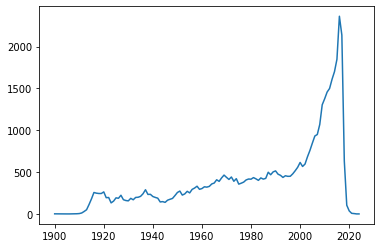

In [319]:
import matplotlib.pyplot as plt

t = titles
p = t['year'].value_counts()
p.sort_index().plot()
plt.show()

# 3. Groupby
## Groupby with column-names

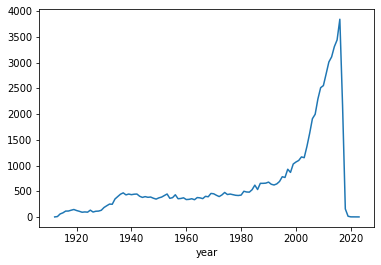

In [320]:
cg = c.groupby(['year']).size()
cg.plot()
plt.show()

In [321]:
c = casts
cf = c[c['name'] == 'Aaron Abrams']
cf.groupby(['year']).size().head()

year
2003    2
2004    2
2005    2
2006    1
2007    2
dtype: int64

In [324]:
cf.groupby(['year', 'title']).size().head()

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
2004  Resident Evil: Apocalypse               1
      Siblings                                1
2005  Cinderella Man                          1
dtype: int64

In [338]:
c.groupby(['year']).n.max().head()

year
1912     6.0
1913    14.0
1914    39.0
1915    14.0
1916    35.0
Name: n, dtype: float64

In [329]:
c.groupby(['year']).n.min().head()

year
1912    6.0
1913    1.0
1914    1.0
1915    1.0
1916    1.0
Name: n, dtype: float64

In [331]:
c.groupby(['year']).n.mean().head()

year
1912    6.000000
1913    4.142857
1914    7.085106
1915    4.236111
1916    5.037736
Name: n, dtype: float64

In [342]:
decade = c['year']//10*10
c_dec = c.groupby(decade).n.size()
c_dec.head()

year
1910     669
1920    1121
1930    3448
1940    3997
1950    3892
Name: n, dtype: int64

<AxesSubplot:xlabel='year'>

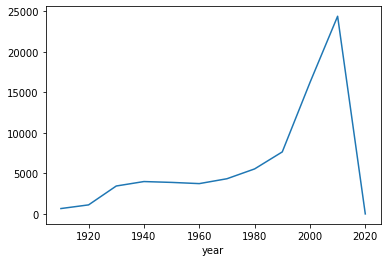

In [345]:
c_dec = c.groupby(decade).n.size()
c_dec.plot()